# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives


At the end of the experiment, you will be able to:

* Calculate the eigen values and eigen vectors
* Appy PCA using sklearn package

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_PCA" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Importing required packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the iris dataset

In [6]:
iris_df = pd.read_csv("/content/Iris.csv")
iris_df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##  Mathematical calculation of eigen values and eigen vectors

Step 1:   Standardization

Step 2:   Compute the Covariance matrix

Step 3:  Compute the Eigenvalues and Eigenvectors of the Covariance matrix to identify the principal components

**Step 1:** Standardization (Scaling the data)


Standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis. For instance All features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function.

So, for each observed value of the variable, subtract the mean and divide by the standard deviation.

Standardization of datasets is a common requirement for many machine learning estimators, which is implemented in scikit-learn

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = iris_df.iloc[:,:4]
scaler.fit(features)
scaled_data = scaler.transform(features)
print(scaled_data[:10])

[[-1.72054204 -0.90068117  1.03205722 -1.3412724 ]
 [-1.69744751 -1.14301691 -0.1249576  -1.3412724 ]
 [-1.67435299 -1.38535265  0.33784833 -1.39813811]
 [-1.65125846 -1.50652052  0.10644536 -1.2844067 ]
 [-1.62816394 -1.02184904  1.26346019 -1.3412724 ]
 [-1.60506942 -0.53717756  1.95766909 -1.17067529]
 [-1.58197489 -1.50652052  0.80065426 -1.3412724 ]
 [-1.55888037 -1.02184904  0.80065426 -1.2844067 ]
 [-1.53578584 -1.74885626 -0.35636057 -1.3412724 ]
 [-1.51269132 -1.14301691  0.10644536 -1.2844067 ]]


In [35]:
print(np.mean(scaled_data, axis = 0))

[ 0.00000000e+00 -4.73695157e-16 -6.63173220e-16  3.31586610e-16]


In [36]:
print(np.var(scaled_data, axis=0))

[1. 1. 1. 1.]


**Step 2:** Compute the covariance matrix

Covariance is to measure how the variables of the input dataset are varying from the mean with respect to each other. 

The covariance matrix is a d × d symmetric matrix (d is the number of dimensions) where each element represents the covariance between two features

Assume $A$ is the standardized data, then Co-variance Matrix of $A$ would be, $Σ =\tfrac{A^T.A}{(n-1)} $ 

where $A^T$ = Transpose of matrix A and n is number of samples. 


In [37]:
# Number of samples
n = scaled_data.shape[0]

# Calculate the co-variance matrix
cov_mat = (scaled_data).T.dot(scaled_data) / (n-1)

print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[ 1.00671141  0.72148618 -0.40039813  0.8886718 ]
 [ 0.72148618  1.00671141 -0.11010327  0.87760486]
 [-0.40039813 -0.11010327  1.00671141 -0.42333835]
 [ 0.8886718   0.87760486 -0.42333835  1.00671141]]


In Numpy, the covariance can be directly calculated using numpy cov function

In [38]:
print('NumPy covariance matrix: \n%s' %np.cov(scaled_data.T))

NumPy covariance matrix: 
[[ 1.00671141  0.72148618 -0.40039813  0.8886718 ]
 [ 0.72148618  1.00671141 -0.11010327  0.87760486]
 [-0.40039813 -0.11010327  1.00671141 -0.42333835]
 [ 0.8886718   0.87760486 -0.42333835  1.00671141]]


**Step 3:** Compute the Eigenvalues and Eigenvectors

After the covariance matrix is generated, eigen decomposition is performed on the covariance matrix. Eigenvectors and Eigenvalues are found as a result of the eigen decomposition. 

Eigenvectors of a covariance matrix are actually the directions of the axes where there is a most variance (most information).

Eigenvalues are coefficients attached to each Eigenvector. Each Eigenvector has a corresponding Eigenvalue, and the sum of the Eigenvalues represents all of the variance within the entire dataset.


In [39]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.55318314  0.31153594 -0.77256222 -0.00902118]
 [ 0.51774664  0.48025478  0.56930389 -0.42093567]
 [-0.28847469 -0.16889872 -0.2641027  -0.90471285]
 [ 0.58541369 -0.80235523  0.09638701 -0.06501105]]

Eigenvalues 
[2.83122907 0.04725055 0.22729518 0.92107083]


Sort the eigen values and plot to find the variance between the eign values.


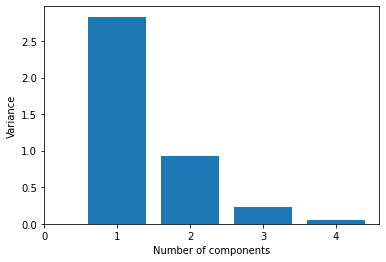

In [40]:
# Finding the variance between the eign values
plt.bar(range(1,5),sorted(eig_vals, reverse=True)) 
plt.xticks(np.arange(0, 5, 1))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

The first two components together covering most of the information. So, third and fourth components can be dropped without losing much information.

## Applying PCA from sklearn package

For educational purposes, we went a long way in calculating principal components for Iris dataset. But sklearn provides PCA function to fit and transform the scaled data and get the variance of each component using the *explained_variance_* 

In [41]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
pca = PCA()
pca_transformed = pca.fit_transform(scaled_data)

In [42]:
pca_transformed.shape

(150, 4)

PCA function provides **explained_variance_** which gives the variance explained at each of the selected components.



In [18]:
variance = pca.explained_variance_

Plot the variance at each component

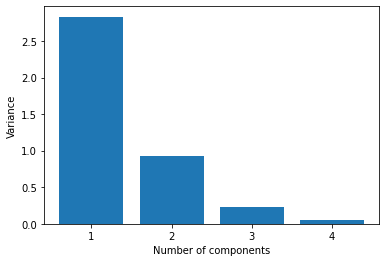

In [19]:
plt.bar(range(1,5), variance)
plt.xticks(np.arange(1, 5, 1))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

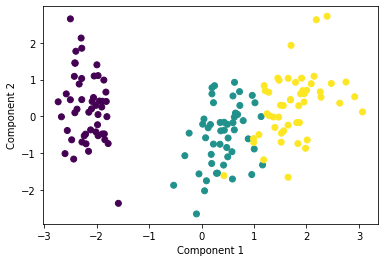

In [20]:
# Defining labels to plot with color
label_convert = {"Iris-setosa" : 0, "Iris-versicolor" :1,"Iris-virginica":2}
labels = iris_df.replace(label_convert).iloc[:,5]
# 2 dimensional data
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=labels)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## Please answer the questions below to complete the experiment:

In [21]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [29]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [23]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [31]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [32]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7570
Date of submission:  18 Oct 2020
Time of submission:  09:22:33
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
